In [19]:

using DelimitedFiles
#using LightGraphs
using LinearAlgebra 
using PyPlot
using Random
#using BenchmarkTools
using Distributions
using StatsBase
#using  OrdinaryDiffEq ###DifferentialEquations
#using DiffEqCallbacks

In [20]:
N=100000

100000

In [21]:
sol1=readdlm("j1=1,j2=5,k1=6.5,k2=9,N=100000,forward_last_time_point.txt");
sol2=readdlm("j1=1,j2=5,k1=6.5,k2=9,N=100000,backward_last_time_point.txt");


In [22]:

x1 = sol1[1:N,end]
θ1 = sol1[N+1:2*N,end]

x2 = sol2[1:N,end]
θ2=  sol2[N+1:2*N,end]

wpe1= mean(exp.((x1+θ1)*1im))
wme1= mean(exp.((x1-θ1)*1im)) 
rpe1=abs.(wpe1) 
ψpe1=angle.(wpe1)
rme1=abs.(wme1)
ψme1=angle.(wme1);

wpe2= mean(exp.((x2+θ2)*1im))
wme2= mean(exp.((x2-θ2)*1im)) 
rpe2=abs.(wpe2) 
ψpe2=angle.(wpe2)
rme2=abs.(wme2)
ψme2=angle.(wme2);

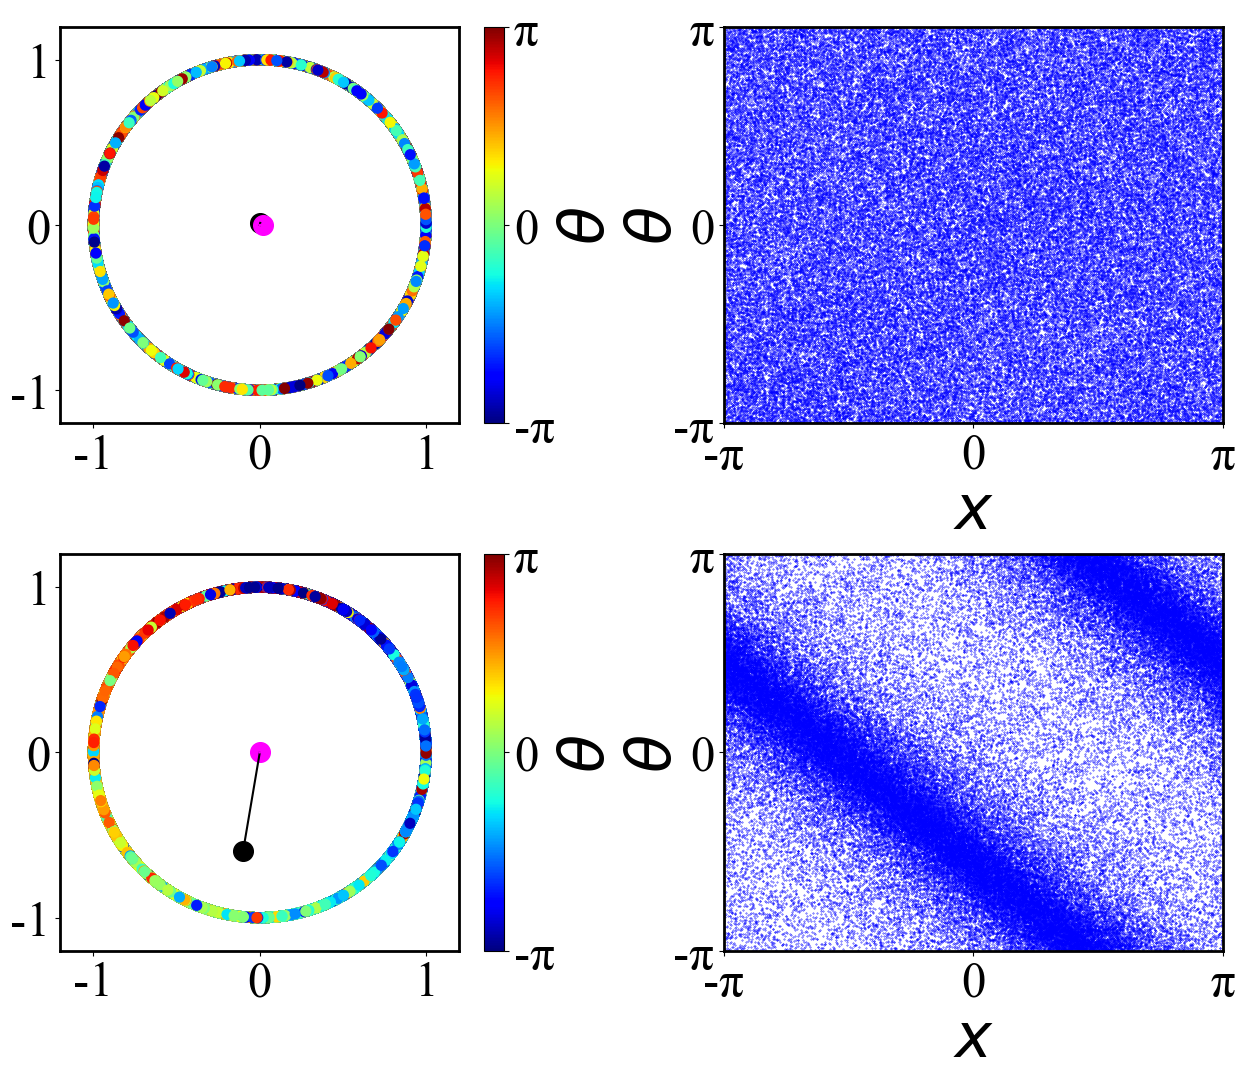

In [50]:

clf()
figure(figsize=(15, 12))
##################################    
subplot(221)
ax = gca()
ax.spines["top"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
xlim(-1.2,1.2)
ylim(-1.2,1.2) 
#xlabel("x", fontsize=20)
#ylabel("y", fontsize=20)
ticks = [-1, 0, 1]
tick_labels = ["-1", "0", "1"]
PyPlot.xticks(ticks, tick_labels, fontsize=35, fontname="Times New Roman")
PyPlot.yticks(ticks, tick_labels, fontsize=35, fontname="Times New Roman")
scatter(cos.(x1),sin.(x1),c=θ1,cmap="jet",vmin=-π, vmax=π,s=50)
colorbar_obj = colorbar(label="θ", ticks=[-π, 0, π])
colorbar_obj.ax.set_yticklabels(["-π", "0", "π"], fontsize=35, fontname="Times New Roman")
colorbar_obj.set_label(L"θ", fontsize=45, fontname="Times New Roman")
pte1x1=[0,rpe1*cos(ψpe1)]
pte1y1=[0,rpe1*sin(ψpe1)]
pte2x1=[0,rme1*cos(ψme1)]
pte2y1=[0,rme1*sin(ψme1)]
scatter(pte1x1[2],pte1y1[2],c="black",s=200)
scatter(pte2x1[2],pte2y1[2],c="magenta",s=200)
plot(pte1x1,pte1y1, c="black" )
plot(pte2x1,pte2y1, c="magenta" )
####################################################
subplot(222)
ax = gca()
ax.spines["top"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
scatter(x1,θ1,c="blue",s=0.1)
xlabel(L"$x$",fontsize=45,fontname="Times New Roman")
ylabel(L"$θ$",fontsize=45, fontname="Times New Roman")
ax.yaxis.set_label_coords(-0.08, 0.5)
ylim(-π,π)
xlim(-π,π)
#title("N=$N,j1=$j1,k1=$k1,j2=$j2,k2=$k2")
ticks = [-π, 0, π]
tick_labels = ["-π", "0", "π"]
PyPlot.xticks(ticks, tick_labels, fontsize=35, fontname="Times New Roman")
PyPlot.yticks(ticks, tick_labels, fontsize=35, fontname="Times New Roman")
####################################################

##################################    
subplot(223)
ax = gca()
ax.spines["top"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
xlim(-1.2,1.2)
ylim(-1.2,1.2) 
#xlabel("x", fontsize=20)
#ylabel("y", fontsize=20)
ticks = [-1, 0, 1]
tick_labels = ["-1", "0", "1"]
PyPlot.xticks(ticks, tick_labels, fontsize=35, fontname="Times New Roman")
PyPlot.yticks(ticks, tick_labels, fontsize=35, fontname="Times New Roman")
scatter(cos.(x2),sin.(x2),c=θ2,cmap="jet",vmin=-π, vmax=π,s=50)
colorbar_obj = colorbar(label="θ", ticks=[-π, 0, π])
colorbar_obj.ax.set_yticklabels(["-π", "0", "π"], fontsize=35, fontname="Times New Roman")
colorbar_obj.set_label(L"θ", fontsize=45, fontname="Times New Roman")
#pte1x2=[0,rpe2*cos(ψpe2)]
#pte1y2=[0,rpe2*sin(ψpe2)]
#pte2x2=[0,rme2*cos(ψme2)]
#pte2y2=[0,rme2*sin(ψme2)]
#scatter(pte1x2[2],pte1y2[2],c="black",s=150)
#scatter(pte2x2[2],pte2y2[2],c="magenta",s=150)
#plot(pte1x2,pte1y2, c="black" )
#plot(pte2x2,pte2y2, c="magenta" )
pte1x2=[0,real(wpe2)]
pte1y2=[0,imag(wpe2)]
pte2x2=[0,real(wme2)]
pte2y2=[0,imag(wme2)]
scatter(pte1x2[2],pte1y2[2],c="black",s=200)
scatter(pte2x2[2],pte2y2[2],c="magenta",s=200)
plot(pte1x2,pte1y2, c="black" )
plot(pte2x2,pte2y2, c="magenta" )

####################################################
subplot(224)
ax = gca()
ax.spines["top"].set_linewidth(2)
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
scatter(x2,θ2,c="blue",s=0.1)
xlabel(L"x", fontsize=45, fontname= "Times New Roman")
ylabel(L"θ", fontsize=45, fontname= "Times New Roman")
ax.yaxis.set_label_coords(-0.08, 0.5)
ylim(-π,π)
xlim(-π,π)
#title("N=$N,j1=$j1,k1=$k1,j2=$j2,k2=$k2")
ticks = [-π, 0, π]
tick_labels = ["-π", "0", "π"]
PyPlot.xticks(ticks, tick_labels, fontsize=35, fontname="Times New Roman")
PyPlot.yticks(ticks, tick_labels, fontsize=35, fontname="Times New Roman")
####################################################

subplots_adjust(wspace=0.33)
subplots_adjust(hspace=0.33)
#gcf()

savefig("./new_snapshot_N=$N,j1=1,k1=6.5,j2=5,k2=9.png", dpi = 600, format = "png", transparent = false)
savefig("./new_snapshot_N=$N,j1=1,k1=6.5,j2=5,k2=9.eps", dpi = 600, format = "eps", transparent = false)
savefig("./new2_snapshot_N=$N,j1=1,k1=6.5,j2=5,k2=9.png", dpi = 300, format = "png", transparent = false)
savefig("./new2_snapshot_N=$N,j1=1,k1=6.5,j2=5,k2=9.eps", dpi = 300, format = "eps", transparent = false)